Project flow importing the libraries importing the dataset Data preprocessing and data scaling EDA - Exploratory Data Analysis
Feature engineering train test split Feature scaling choosing the model and building it training your model predicting the new result making the confusion matrix evaluating your model-classification metric

# SVM-SVC

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_excel("C:/Users/pooja sinalkar/Downloads/Social_Network_Ads.xlsx")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [4]:
dataset.isnull().sum()

User ID            27
Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset = dataset.dropna(axis=0,how='all')

In [7]:
dataset.isnull().sum()

User ID            16
Gender             25
Age                19
EstimatedSalary     5
Purchased           0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 18.2+ KB


In [9]:
dataset.drop(columns='User ID',axis=1,inplace=True)

<AxesSubplot:>

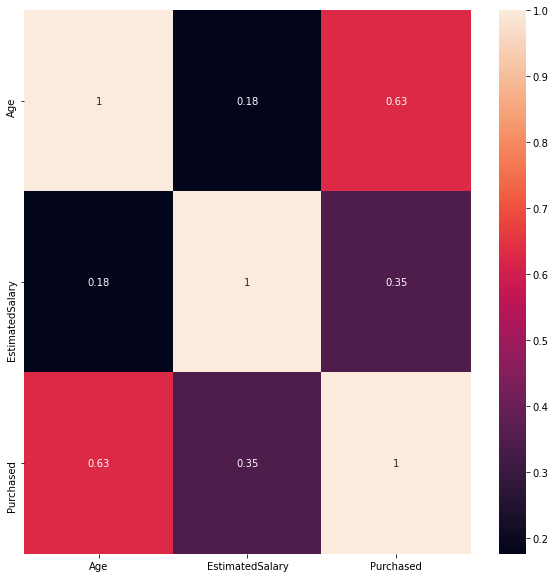

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
gender=pd.get_dummies(dataset.Gender,drop_first=True)

In [13]:
df = pd.concat([gender,dataset],axis=1)

In [14]:
df.head()

,Male,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19.0,19000.0,0.0
1,1,Male,35.0,20000.0,0.0
2,0,Female,26.0,43000.0,0.0
3,0,Female,27.0,57000.0,0.0
4,1,Male,19.0,76000.0,0.0


In [15]:
df.drop(columns='Gender',axis=1,inplace=True)

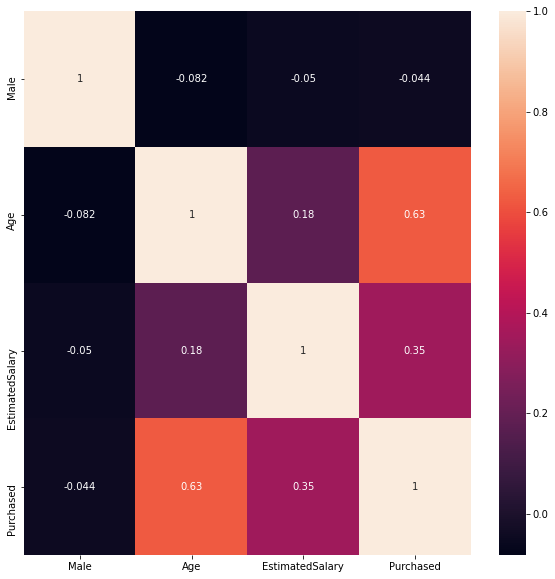

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
df

,Male,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0.0
1,1,35.0,20000.0,0.0
2,0,26.0,43000.0,0.0
3,0,27.0,57000.0,0.0
4,1,19.0,76000.0,0.0
...,...,...,...,...
395,0,46.0,41000.0,1.0
396,1,51.0,23000.0,1.0
397,0,50.0,20000.0,1.0
398,1,36.0,33000.0,0.0


In [18]:
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(0)

In [19]:
df['Age']=df['Age'].fillna(method='ffill')

In [20]:
df.isnull().sum()

Male               0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
df.drop(columns='Male',axis=1,inplace=True)

In [22]:
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0.0
1,35.0,20000.0,0.0
2,26.0,43000.0,0.0
3,27.0,57000.0,0.0
4,19.0,76000.0,0.0


In [23]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [24]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
stanscale = StandardScaler()
x = stanscale.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 8)

In [26]:
model = SVC(kernel = 'linear')

In [27]:
y_train

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [28]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
y_pred = model.predict(x_test)

In [30]:
y_pred

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1.])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  6],
       [ 9, 22]], dtype=int64)

# CLASSIFICATION MATRIX

In [38]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        47
         1.0       0.79      0.71      0.75        31

    accuracy                           0.81        78
   macro avg       0.80      0.79      0.80        78
weighted avg       0.81      0.81      0.81        78

